In [1]:
import requests
import numpy as np

import calendar

import matplotlib.pyplot as plt
from cycler import cycler
plt.rc('figure', dpi=150)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=10)
berlin = {
    "U1": "#62AD2D",
    "U2": "#E94D10",
    "U3": "#00A192",
    "U4": "#FFD401",
    "U5": "#815237",
    "U6": "#846DAA",
    "U7": "#009AD9",
    "U8": "#005A99",
    "U9": "#F18800",
    "S9": "#9B2B48",
    "S7": "#846DAA",
    "S8": "#62AD2D",
    "S2": "#007B3D",
}
palette =  [berlin["U7"], berlin["U1"], berlin["U9"],berlin["U2"], berlin["U2"], berlin["U8"], berlin["U6"]]
plt.rc('axes', prop_cycle=cycler(color=palette))

# For dark background
plt.style.use({
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
})


In [2]:
natlan_sst_url = "https://climatereanalyzer.org/clim/sst_daily/json_2clim/oisst2.1_natlan_sst_day.json"
response = requests.get(natlan_sst_url)
natlan_sst_data = response.json()

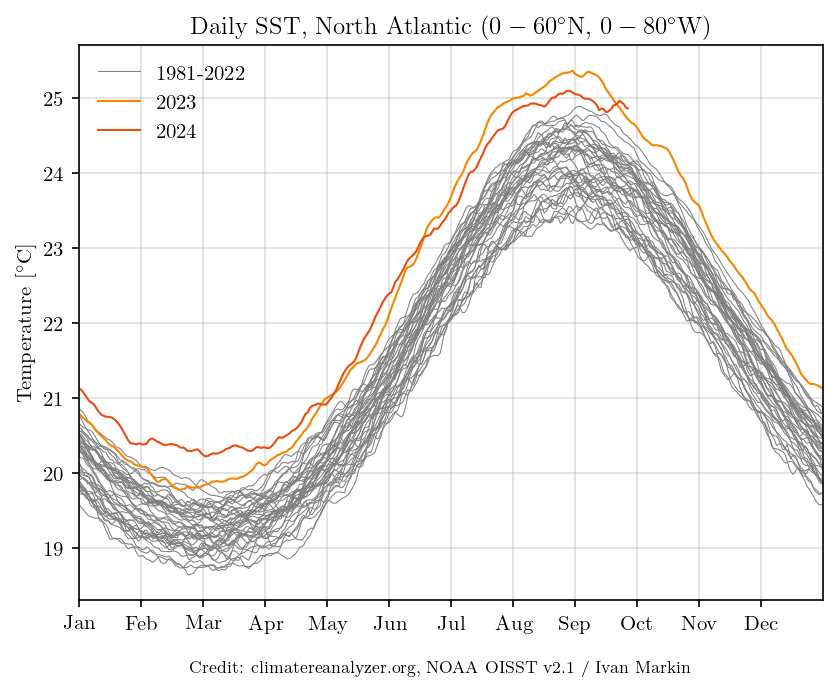

In [4]:
m = {}

label = "1981-2022"

for dataseries in natlan_sst_data:
    if dataseries['name'].__contains__('-'):
        continue
    year = dataseries['name']
    sst = np.array(dataseries['data'])
    days = np.arange(366)
    color = 'gray'
    lw = 0.5

    if year == "2023":
        color = berlin["U9"]
        lw = 1.0
        label = year
    if year == "2024":
        color = berlin["U2"]
        lw = 1.0
        label = year
    plt.plot(days, sst, label=label, color=color, lw=lw)
    if label == "1981-2022":
        label=None

plt.xlim(0, 365)
major_ticks = np.linspace(0, 365, 12, endpoint=False)
plt.gca().set_xticks(major_ticks)
plt.gca().set_xticklabels(list(calendar.month_abbr[1:]))
plt.grid(alpha=0.4)
plt.legend(frameon=False)
plt.ylabel(r"Temperature [$\mathrm{^\circ C}$]")
plt.title(r"Daily SST, North Atlantic ($\mathrm{0-60^\circ N}$, $\mathrm{0-80^\circ W}$)")

txt="Credit: climatereanalyzer.org, NOAA OISST v2.1 / Ivan Markin"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=8)

plt.savefig('daily_sst_north_atlantic.pdf', transparent=True, bbox_inches='tight')
